In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:10<00:00, 129MB/s]
100% 1.06G/1.06G [00:10<00:00, 106MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [11]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 241ms/step - accuracy: 0.8332 - loss: 0.4133 - val_accuracy: 0.9016 - val_loss: 0.2329
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 251ms/step - accuracy: 0.8944 - loss: 0.2431 - val_accuracy: 0.9122 - val_loss: 0.2053
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 258ms/step - accuracy: 0.9050 - loss: 0.2209 - val_accuracy: 0.8912 - val_loss: 0.2634
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 235ms/step - accuracy: 0.9082 - loss: 0.2101 - val_accuracy: 0.9108 - val_loss: 0.2021
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 234ms/step - accuracy: 0.9181 - loss: 0.1955 - val_accuracy: 0.9178 - val_loss: 0.1884
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 235ms/step - accuracy: 0.9211 - loss: 0.1841 - val_accuracy: 0.9186 - val_loss: 0.1891
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 237ms/step - accuracy: 0.9221 - loss: 0.1843 - val_accuracy: 0.9050 - val_loss: 0.2434
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 236ms/step - accuracy: 0.9197 - loss: 0.18

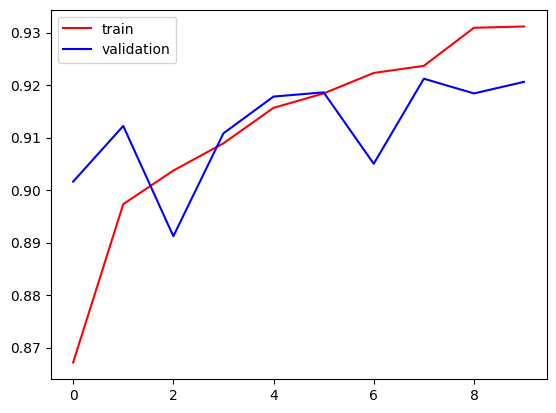

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

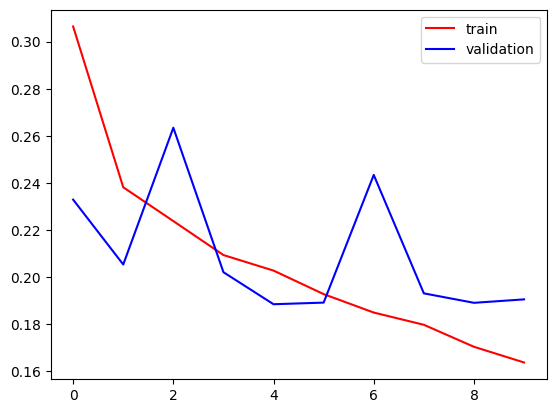

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
import cv2

In [18]:
test_img=('/content/dog.jpg')

In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the image
img_path = '/content/dog.jpg'
img = load_img(img_path, target_size=(150, 150))  # Resize to match model's input size
img_array = img_to_array(img)  # Convert to array (float32 by default)

# Ensure the image array is in the correct numeric format
img_array = img_array.astype('float32')

# Normalize the image data to [0, 1]
img_array = img_array / 255.0

# Add batch dimension (1, 150, 150, 3)
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
prediction = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [22]:
print(prediction)

[[1.]]


In [24]:
img_path = '/content/cat.jpg'
img = load_img(img_path, target_size=(150, 150))  # Resize to match model's input size
img_array = img_to_array(img)  # Convert to array (float32 by default)

# Ensure the image array is in the correct numeric format
img_array = img_array.astype('float32')

# Normalize the image data to [0, 1]
img_array = img_array / 255.0

# Add batch dimension (1, 150, 150, 3)
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print(f"This image is predicted to be class 1 with a confidence of {prediction[0][0]*100:.2f}%")
else:
    print(f"This image is predicted to be class 0 with a confidence of {(1 - prediction[0][0])*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
This image is predicted to be class 0 with a confidence of 100.00%


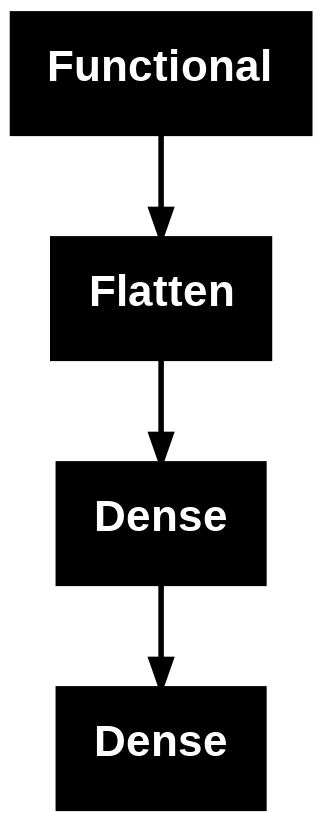

In [25]:
from keras.utils import plot_model
plot_model(model)